1) Prepare a classification model using svm 
for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
salary_train=pd.read_csv("SalaryData_Train.csv")
salary_test=pd.read_csv("SalaryData_Test.csv")

In [2]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_train.shape,salary_test.shape

((30161, 14), (15060, 14))

In [5]:
#combine both training and testing data
salary_df=pd.concat([salary_train,salary_test])

In [6]:
salary_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#check the null values
salary_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

no null values in the data set

In [8]:
#count the number of items in workclass columns
salary_df["workclass"].value_counts()

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [9]:
#count the number of items in education columns
salary_df["education"].value_counts()

 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

In [10]:
#count the number of items maritalstatus  columns
salary_df["maritalstatus"].value_counts()

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

In [11]:
#count the number of items in occupation columns
salary_df["occupation"].value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2969
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [12]:
#count the number of items in relationship columns
salary_df["relationship"].value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1348
Name: relationship, dtype: int64

In [13]:
#count the number of items in Sex columns
salary_df["sex"].value_counts()

 Male      30527
 Female    14694
Name: sex, dtype: int64

In [14]:
#count the number of items in Salary columns
salary_df["Salary"].value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

# VISUALIZATION

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sathi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


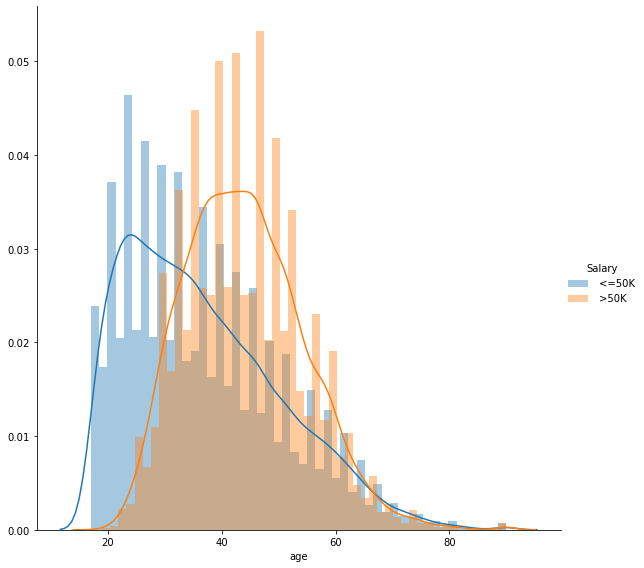

In [16]:
#Univariate analysis of Salary based on age using Histograms
g = sns.FacetGrid(salary_df, hue = "Salary",size=8)
g.map(sns.distplot, "age")
g.add_legend()
plt.show()

here we can see that age between 25 to 50 has salary>50k

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


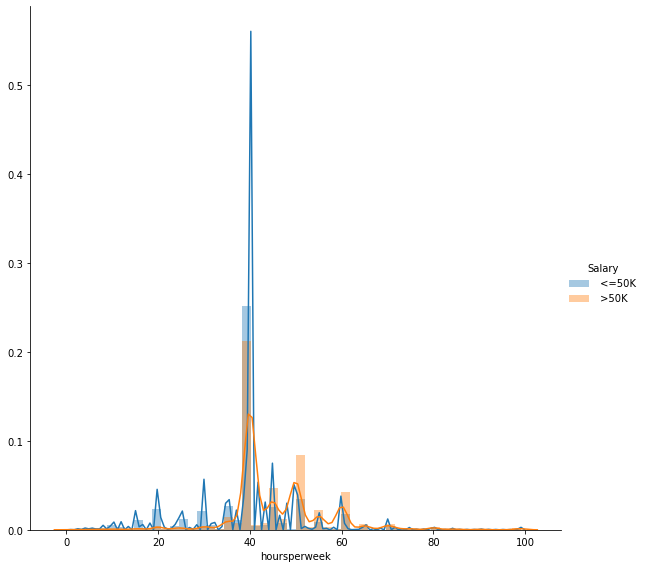

In [17]:
#Univariate analysis of Salary based on age using Histograms
g = sns.FacetGrid(salary_df, hue = "Salary",size=8)
g.map(sns.distplot, "hoursperweek")
g.add_legend()
plt.show()


here we can see that the people whose salary<=50 k works maximum 40 hrs per week, peaople who are

working  >40 hrs per week got salary>50k

In [18]:
salary_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:xlabel='workclass', ylabel='count'>

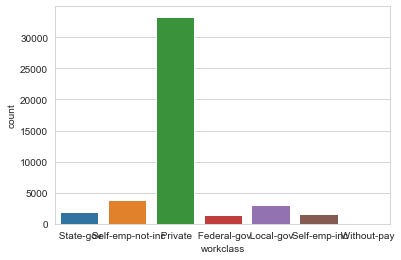

In [19]:
#visualize workclass  using seaborn
sns.set_style("whitegrid")
sns.countplot(x='workclass',data=salary_df)

<AxesSubplot:xlabel='sex', ylabel='count'>

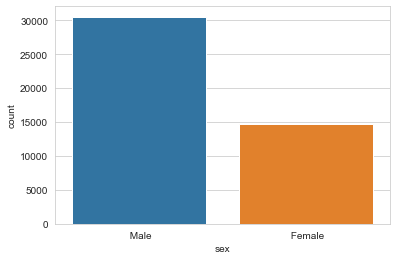

In [20]:
#visualize sex using seaborn
sns.set_style("whitegrid")
sns.countplot(x='sex',data=salary_df)

<AxesSubplot:xlabel='race', ylabel='count'>

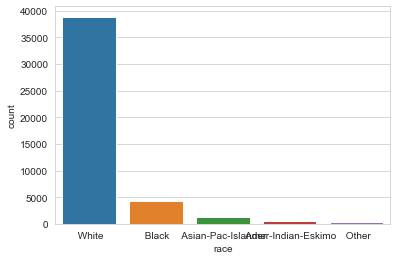

In [21]:
#visualize race using seaborn
sns.set_style("whitegrid")
sns.countplot(x='race',data=salary_df)

here many attributes are in categorical format, so convert it in a numerical form

In [22]:
#convert categorical variables into numerical format using label encoding

string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [23]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
     salary_df[i] = number.fit_transform(salary_df[i])
    

In [24]:
salary_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [25]:
salary_df.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [26]:
salary_df["Salary"].value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

In [27]:
salary_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

# # Feature Engineering

In [28]:
features=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']


In [29]:
X=salary_df[features]
y=salary_df["Salary"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33915, 13), (33915,), (11306, 13), (11306,))

# BUILDING SUPPORT VECTOR MACHINE

In [32]:
from sklearn.svm import SVC # "Support Vector Classifier" 
model = SVC(kernel='linear') 


In [33]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
#prediction
prediction=model.predict(X_test)
prediction  

array([0, 0, 0, ..., 0, 0, 1])

In [35]:
#check the accuracy

accuracy= round(model.score(X_train, y_train) * 100, 2) 
accuracy

80.8

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[8381,  184],
       [1884,  857]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      8565
           1       0.82      0.31      0.45      2741

    accuracy                           0.82     11306
   macro avg       0.82      0.65      0.67     11306
weighted avg       0.82      0.82      0.78     11306



# HYPER PARAMETER TUNING

In [38]:
#from sklearn.model_selection import GridSearchCV

In [39]:
#param={'kernel':('linear','poly','rbf','sigmoid'),
#      'C':[1,52,10],'degree':[3,8],'coef0':[0.001,10,0.5],'gamma':('auto','scale')}

In [40]:
#svm_grids=GridSearchCV(model,param,cv=5)

In [41]:
#svm_grids.fit(X_train,y_train)

In [42]:
#try different kernal to improve the model accuracy

In [43]:
#Kernel = poly
model2 = SVC(kernel = 'poly')
model2.fit(X_train,y_train)

SVC(kernel='poly')

In [44]:
#prediction
pred2=model2.predict(X_test)
pred2 

array([1, 0, 0, ..., 0, 0, 1])

In [45]:
#check the accuracy

accuracy= round(model2.score(X_train, y_train) * 100, 2) 
accuracy

84.33

In [46]:
# kernel = rbf
model3 = SVC(kernel = 'rbf')
model3.fit(X_train,y_train)

SVC()

In [47]:
#prediction
pred3=model3.predict(X_test)
pred3 

array([0, 0, 0, ..., 0, 0, 1])

In [48]:
#check the accuracy

accuracy= round(model3.score(X_train, y_train) * 100, 2) 
accuracy

84.26

In [49]:
# kernel = sigmoid
model4 = SVC(kernel = 'sigmoid')
model4.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [50]:
#prediction
pred4=model4.predict(X_test)
pred4

array([1, 0, 0, ..., 0, 0, 0])

In [51]:
#check the accuracy

accuracy= round(model4.score(X_train, y_train) * 100, 2) 
accuracy

57.17

In [52]:
#try different parameter to improve the accuracy of a model
model5=SVC(kernel='poly',gamma="scale",degree=8,C=1)
model5.fit(X_train,y_train)

SVC(C=1, degree=8, kernel='poly')

In [53]:
#prediction
pred5=model5.predict(X_test)
pred5

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
#check the accuracy

accuracy= round(model5.score(X_train, y_train) * 100, 2) 
accuracy

86.63

got more acuuracy